## **Executive Summary :**


#### 1. Topic of Implementation : Sentiment Analysis using Deep Learning
#### 2. DL Model Used : LSTM
#### 3. Accuracy : **86%**
#### 4. Operations Perfomed : Basic EDA, Data pre-processing, Model Creation, Parameter Tuning and Prediction

## **Introduction:**

**Sentiment Analysis** is one of the most used applications of data science in Real-World Analysis. As the whole world is dependent on Social Media, user opinion and explanation can help us to understand their sentiments and intentions.


In this workbook, I have taken a dataset from Twitter and tried my level best to explain you all the sentiments of users through multiple modelling and deep lerarning techniques.

![](https://monkeylearn.com/static/4e1ff4632ce1a1426c4095fb190d6db2/Learn-How-to-Do-Sentiment-With-Deep-Learning-Thumbnail-02.png)


Data has been taken from [here](https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset)

## **Code for Customization :**

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1,h2 {
    text-align: center;
    background-color: pink;
    padding: 20px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

## **Contents of the Workbook :**

#### Step - 1: Importing Necesaary Libraries and Datasets
#### Step - 2: Data Pre-processing
#### Step - 3: Word Cloud Analysis
#### Step - 4: Word2Vec Analysis
#### Step - 5: Sentiment Analysis using Deep-Learning Model
#### Step - 6: Comparing ML Models


## **Step - 1 :** *Importing Necesaary Libraries and Datasets*

### **Step - 1.1 :** *Importing Necesaary Packages & Libraries*

In [ ]:
# !pip install gensim --upgrade
# !pip install keras --upgrade
# !pip install pandas --upgrade

In [3]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, accuracy_score, f1_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score


# Keras
# from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')

# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict

# Warnings
import warnings 
warnings.filterwarnings('ignore')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
print('torch version:', torch.__version__)
print('cuda available:', torch.cuda.is_available())
print('cuda device count:', torch.cuda.device_count())

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print("There are %d GPU(s) available." % torch.cuda.device_count())
    print("We will use the GPU:", torch.cuda.get_device_name(0))
else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hieu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hieu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hieu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hieu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hieu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


2025-10-02 19:04:07,125 : WARNING : From c:\Users\Hieu\OneDrive\MSE - FPT\Fall 2025\NLP501\Exercises\LSTM\.venv\Lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.

2025-10-02 19:04:07,375 : INFO : TensorFlow version 2.20.0 available.


torch version: 2.8.0+cu126
cuda available: True
cuda device count: 1
There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3060


### **Step - 1.2 :** *Importing Dataset*

In [4]:
df = pd.read_csv("Twitter_Data.csv")
df1 = df

In [5]:
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
df = df[df.category != 0.0]

**Note:** I have removed neutral comments as I wanted to perform analysis specific to Negative and Positive sentiments

In [8]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107767 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  107765 non-null  object 
 1   category    107760 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


## **Step - 2 :** *Data Pre-processing*

### **Step - 2.1 :** Variable Declaration

In [9]:
# Varaibles related to dataset
DATASET_COLUMNS = ["clean_text", "category"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# Parameters for WORD2VEC
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# Parameters related to KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# Variable specific to SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# Variables for Exporting purpose
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

# MISC

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250


### **Step - 2.2 :** Null Values Identification and Treatment

In [10]:
# Confirming presence of missing values in each variable
df.isnull().sum()

clean_text    2
category      7
dtype: int64

In [11]:
df.dropna(how='any', inplace=True) # Removed these rows as the count is small and will not affect overall modelling
df.isnull().sum()

clean_text    0
category      0
dtype: int64

**Note**: No Nulls present

### **Step - 2.3 :** Label Encoding

In [12]:
decode_map = {-1.0: "NEGATIVE", 1.0: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [13]:
#%%time
df.category = df.category.apply(lambda x: decode_sentiment(x))

Text(0.5, 1.0, 'Dataset labels distribuition')

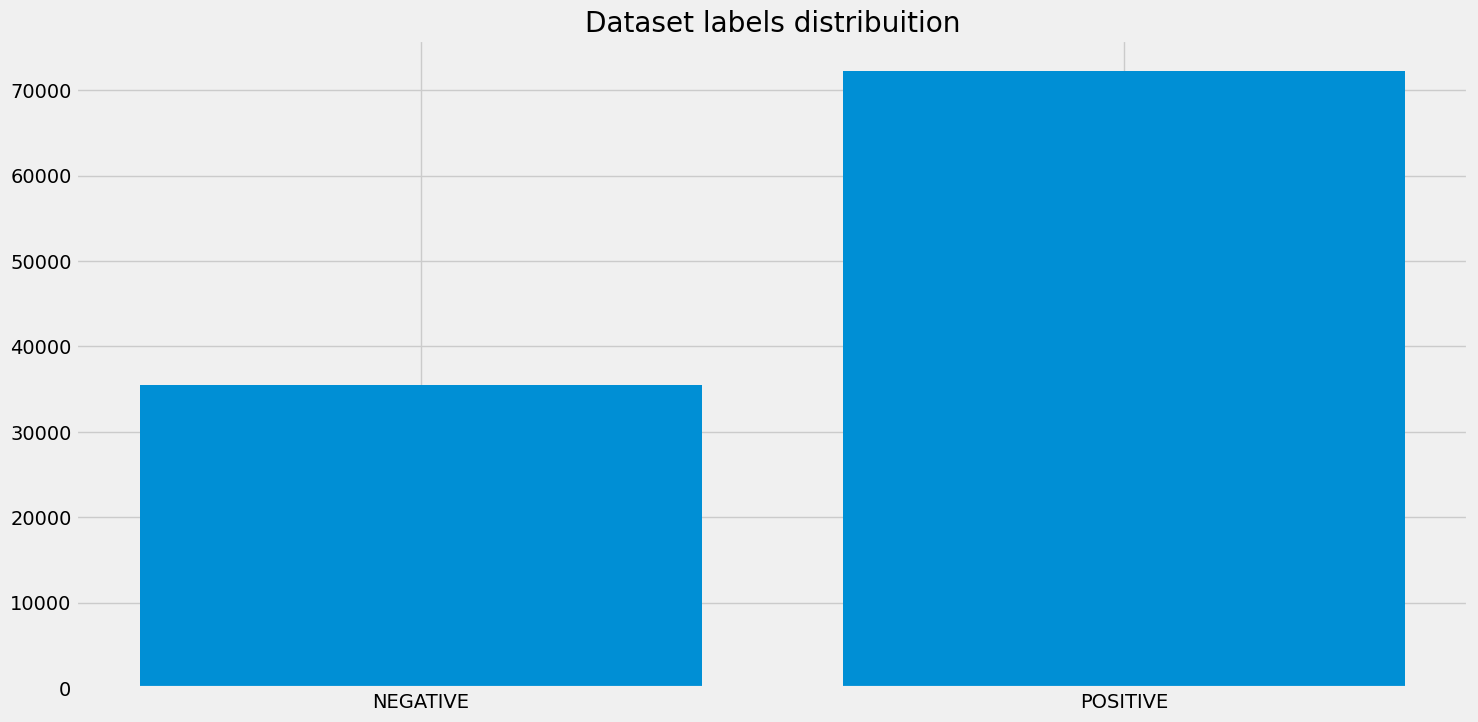

In [14]:
category_cnt = Counter(df.category)

plt.figure(figsize=(16,8))
plt.bar(category_cnt.keys(), category_cnt.values())
plt.title("Dataset labels distribuition")

### **Step - 2.4 :** Text Manipulation and Structurization

In [15]:
# Including Stopwords and exclusing 'not' related stopwords

stop_words = set(stopwords.words("english"))
stop_words.remove('not')
more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
stop_words = stop_words.union(more_stopwords)
                 
stemmer = SnowballStemmer("english")

In [16]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'^[^ ]<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_quotes(text):
    quotes = re.compile(r'[^A-Za-z0-9\s]+')
    return re.sub(quotes, '', text)


# Applying helper functions

df['mod_text'] = df['clean_text'].apply(lambda x: remove_URL(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_emoji(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_html(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_punct(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_quotes(x))
df.head()

,clean_text,category,mod_text
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...
8,with upcoming election india saga going import...,POSITIVE,with upcoming election india saga going import...


In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hieu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
# Tokenizing the tweet base texts.

df['tokenized'] = df['mod_text'].apply(word_tokenize)

df.head()

,clean_text,category,mod_text,tokenized
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma..."
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu..."
8,with upcoming election india saga going import...,POSITIVE,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,..."


In [20]:
# Lower casing clean text.

df['lower'] = df['tokenized'].apply(
    lambda x: [word.lower() for word in x])

df.head()

,clean_text,category,mod_text,tokenized,lower
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma..."
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu..."
8,with upcoming election india saga going import...,POSITIVE,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...","[with, upcoming, election, india, saga, going,..."


In [21]:
# Removing stopwords.

df['stopwords_removed'] = df['lower'].apply(
    lambda x: [word for word in x if word not in stop_words])

df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,..."
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today..."
8,with upcoming election india saga going import...,POSITIVE,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...","[with, upcoming, election, india, saga, going,...","[upcoming, election, india, saga, going, impor..."


In [22]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Hieu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [23]:
# Applying part of speech tags.

df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)

df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ..."
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...","[(say, VB), (vote, NN), (modi, FW), (welcome, ..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w..."
8,with upcoming election india saga going import...,POSITIVE,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...","[with, upcoming, election, india, saga, going,...","[upcoming, election, india, saga, going, impor...","[(upcoming, JJ), (election, NN), (india, NN), ..."


In [24]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


df['wordnet_pos'] = df['pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ...","[(modi, n), (promised, v), (minimum, a), (gove..."
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...","[(say, VB), (vote, NN), (modi, FW), (welcome, ...","[(say, v), (vote, n), (modi, n), (welcome, a),..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB...","[(asking, v), (supporters, n), (prefix, v), (c..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w...","[(answer, n), (among, n), (powerful, a), (worl..."
8,with upcoming election india saga going import...,POSITIVE,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...","[with, upcoming, election, india, saga, going,...","[upcoming, election, india, saga, going, impor...","[(upcoming, JJ), (election, NN), (india, NN), ...","[(upcoming, a), (election, n), (india, n), (sa..."


In [25]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

df['lemmatized'] = df['wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df['lemmatized'] = df['lemmatized'].apply(
    lambda x: [word for word in x if word not in stop_words])

df['lemma_str'] = [' '.join(map(str, l)) for l in df['lemmatized']]

df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ...","[(modi, n), (promised, v), (minimum, a), (gove...","[modi, promise, minimum, government, maximum, ...",modi promise minimum government maximum govern...
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...","[(say, VB), (vote, NN), (modi, FW), (welcome, ...","[(say, v), (vote, n), (modi, n), (welcome, a),...","[say, vote, modi, welcome, bjp, tell, rahul, m...",say vote modi welcome bjp tell rahul main camp...
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB...","[(asking, v), (supporters, n), (prefix, v), (c...","[ask, supporter, prefix, chowkidar, name, modi...",ask supporter prefix chowkidar name modi great...
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w...","[(answer, n), (among, n), (powerful, a), (worl...","[answer, among, powerful, world, leader, today...",answer among powerful world leader today trump...
8,with upcoming election india saga going import...,POSITIVE,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...","[with, upcoming, election, india, saga, going,...","[upcoming, election, india, saga, going, impor...","[(upcoming, JJ), (election, NN), (india, NN), ...","[(upcoming, a), (election, n), (india, n), (sa...","[upcoming, election, india, saga, go, importan...",upcoming election india saga go important pair...


In [26]:
print("Total Rows =", len(df.clean_text))

Total Rows = 107758


In [27]:
df.head()

,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ...","[(modi, n), (promised, v), (minimum, a), (gove...","[modi, promise, minimum, government, maximum, ...",modi promise minimum government maximum govern...
2,what did just say vote for modi welcome bjp t...,POSITIVE,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...","[(say, VB), (vote, NN), (modi, FW), (welcome, ...","[(say, v), (vote, n), (modi, n), (welcome, a),...","[say, vote, modi, welcome, bjp, tell, rahul, m...",say vote modi welcome bjp tell rahul main camp...
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB...","[(asking, v), (supporters, n), (prefix, v), (c...","[ask, supporter, prefix, chowkidar, name, modi...",ask supporter prefix chowkidar name modi great...
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w...","[(answer, n), (among, n), (powerful, a), (worl...","[answer, among, powerful, world, leader, today...",answer among powerful world leader today trump...
8,with upcoming election india saga going import...,POSITIVE,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...","[with, upcoming, election, india, saga, going,...","[upcoming, election, india, saga, going, impor...","[(upcoming, JJ), (election, NN), (india, NN), ...","[(upcoming, a), (election, n), (india, n), (sa...","[upcoming, election, india, saga, go, importan...",upcoming election india saga go important pair...


In [28]:
df_mod = df[["lemma_str", "category"]]
df_mod.head()

,lemma_str,category
0,modi promise minimum government maximum govern...,NEGATIVE
2,say vote modi welcome bjp tell rahul main camp...,POSITIVE
3,ask supporter prefix chowkidar name modi great...,POSITIVE
4,answer among powerful world leader today trump...,POSITIVE
8,upcoming election india saga go important pair...,POSITIVE


### **Step - 2.4 :** Train-Test Split

In [29]:
df_train, df_test = train_test_split(df_mod, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 86206
TEST size: 21552


## **Step - 3 :** *Word Cloud Analysis*

In [30]:
def plot_wordcloud(text, mask, title, title_size, figure_size=(24.0,16.0), image_color=False):
    """ A function for creating wordcloud images """
    words = text
    allwords = []
    for wordlist in words:
        allwords += wordlist
    mostcommon = FreqDist(allwords).most_common(140)
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stop_words,
                    max_words = 140,
                    max_font_size = 120, 
                    random_state = 42,
                    mask = mask,
    ).generate(str(mostcommon))        
    
    ########
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    

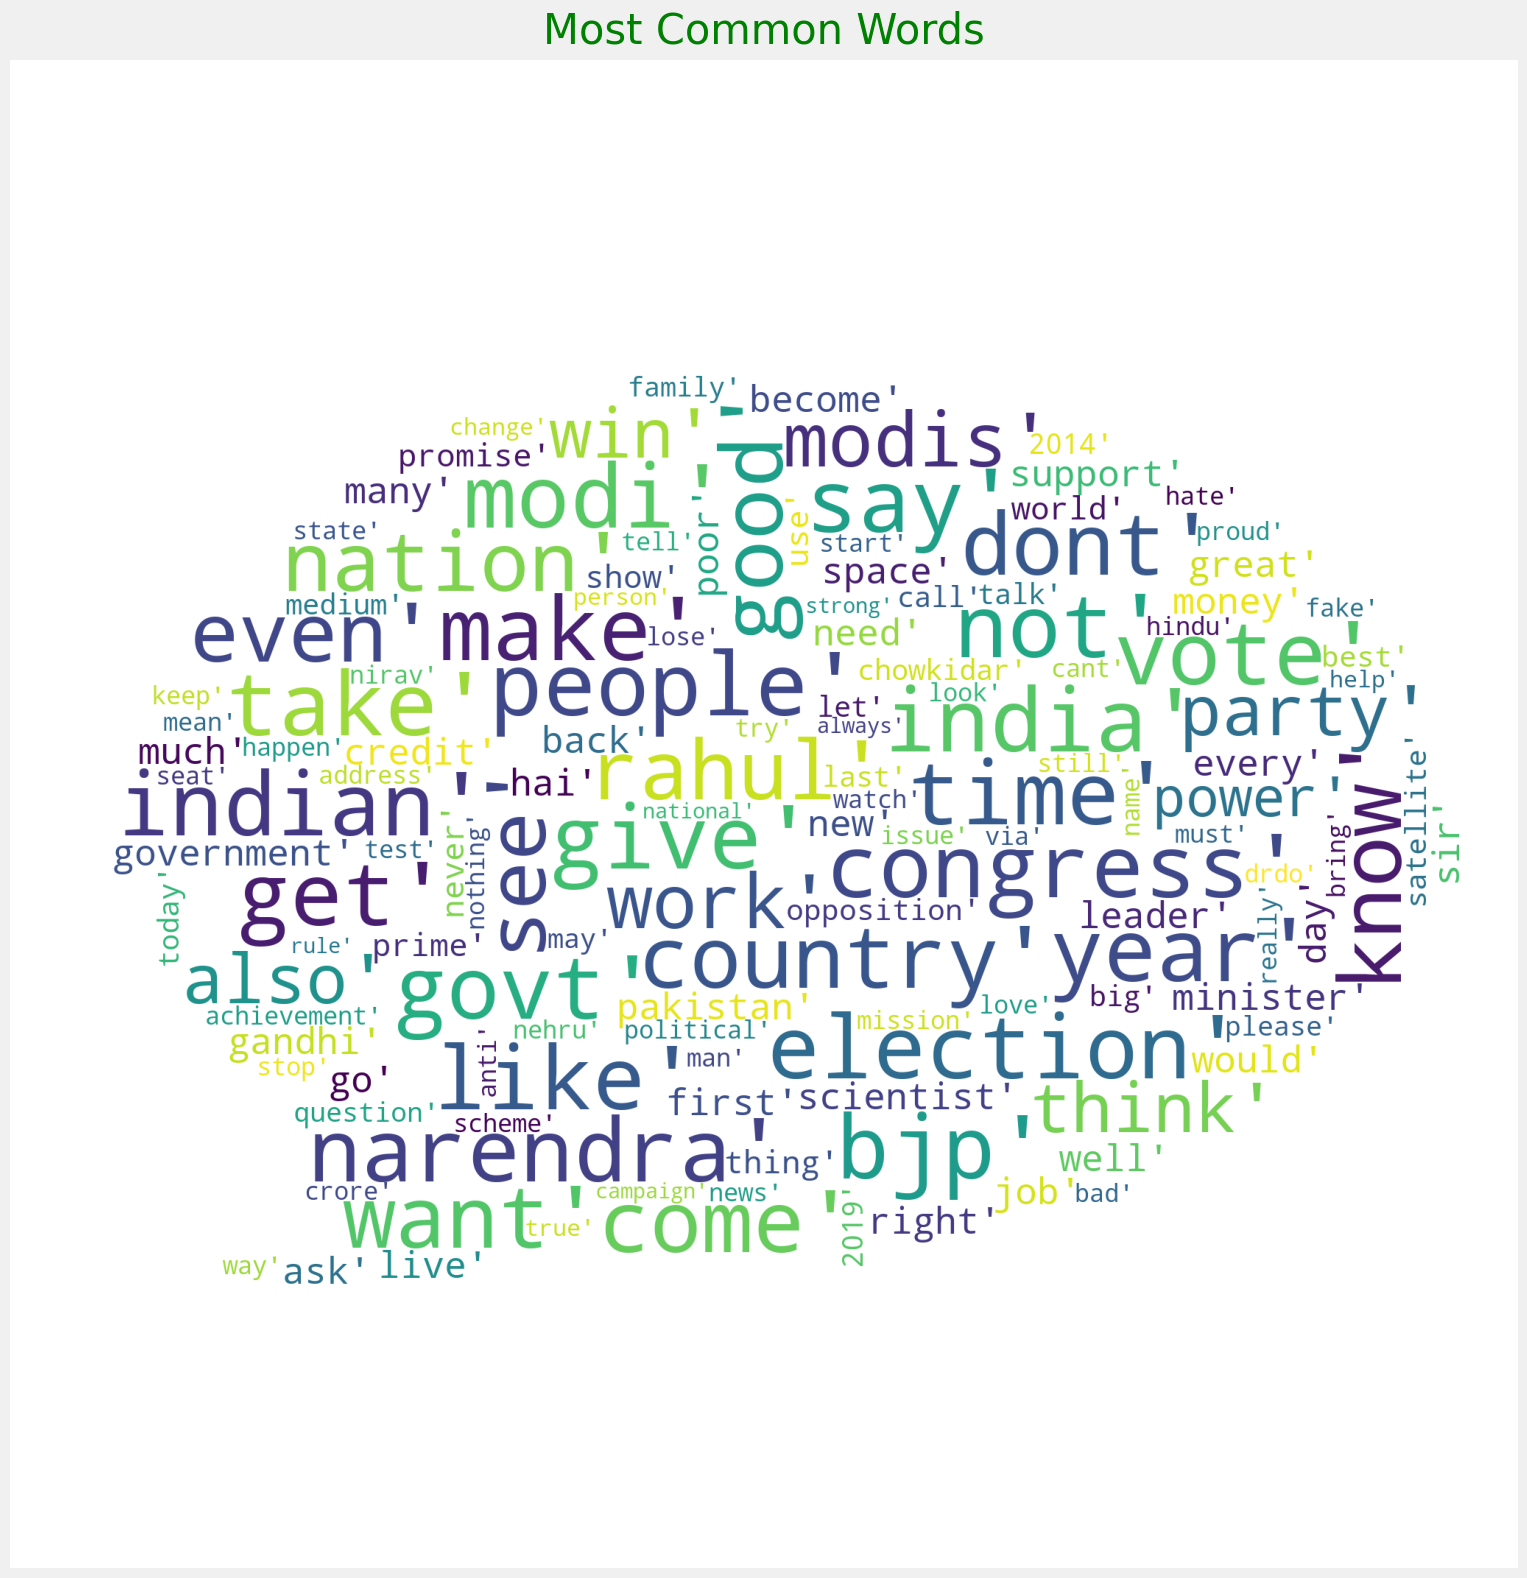

In [31]:
comments_mask = np.array(Image.open('archive/comment.png'))
plot_wordcloud(df['lemmatized'], comments_mask,
               'Most Common Words',
               title_size=30)

## **Step - 4 :** *Word2Vec Analysis*

### **Step - 4.1 :** Corpus Creation

In [32]:
#%%time
documents = [text.split() for text in df_train.lemma_str] 

### **Step - 4.2 :** Word2Vec Model Creation

In [33]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

2025-10-02 19:06:44,797 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.025>', 'datetime': '2025-10-02T19:06:44.797991', 'gensim': '4.3.3', 'python': '3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26220-SP0', 'event': 'created'}


### **Step - 4.3 :** Vocab Creation

In [34]:
w2v_model.build_vocab(documents)

2025-10-02 19:06:47,101 : INFO : collecting all words and their counts
2025-10-02 19:06:47,102 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-10-02 19:06:47,126 : INFO : PROGRESS: at sentence #10000, processed 164832 words, keeping 18786 word types
2025-10-02 19:06:47,144 : INFO : PROGRESS: at sentence #20000, processed 328650 words, keeping 28244 word types
2025-10-02 19:06:47,161 : INFO : PROGRESS: at sentence #30000, processed 493348 words, keeping 36221 word types
2025-10-02 19:06:47,187 : INFO : PROGRESS: at sentence #40000, processed 657611 words, keeping 43124 word types
2025-10-02 19:06:47,210 : INFO : PROGRESS: at sentence #50000, processed 821086 words, keeping 49725 word types
2025-10-02 19:06:47,230 : INFO : PROGRESS: at sentence #60000, processed 985066 words, keeping 55798 word types
2025-10-02 19:06:47,244 : INFO : PROGRESS: at sentence #70000, processed 1149186 words, keeping 61499 word types
2025-10-02 19:06:47,261 : INFO : PROGRESS: at

In [35]:
words = w2v_model.wv.key_to_index.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)


Vocab size 8351


### **Step - 4.4 :** Training Word2Vec Model

In [36]:
#%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2025-10-02 19:06:51,069 : INFO : Word2Vec lifecycle event {'msg': 'training model with 8 workers on 8351 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7 shrink_windows=True', 'datetime': '2025-10-02T19:06:51.069386', 'gensim': '4.3.3', 'python': '3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26220-SP0', 'event': 'train'}
2025-10-02 19:06:51,493 : INFO : EPOCH 0: training on 1417649 raw words (1159189 effective words) took 0.4s, 2816933 effective words/s
2025-10-02 19:06:51,900 : INFO : EPOCH 1: training on 1417649 raw words (1159589 effective words) took 0.4s, 2913078 effective words/s
2025-10-02 19:06:52,313 : INFO : EPOCH 2: training on 1417649 raw words (1159542 effective words) took 0.4s, 2840734 effective words/s
2025-10-02 19:06:52,723 : INFO : EPOCH 3: training on 1417649 raw words (1159784 effective words) took 0.4s, 2908147 effective words/s
2025-10-02 19:06:53,129 : INFO : EPOCH 

(37097774, 45364768)

### **Step - 4.5 :** Word2Vec Model Testing

In [37]:
w2v_model.wv.most_similar("bjp")

[('trs', 0.4280763864517212),
 ('party', 0.42427927255630493),
 ('cadre', 0.4223718047142029),
 ('ncp', 0.38682594895362854),
 ('jds', 0.3834304213523865),
 ('coalition', 0.37800851464271545),
 ('congress', 0.37015268206596375),
 ('ally', 0.35269394516944885),
 ('seat', 0.35150134563446045),
 ('dmk', 0.3424919545650482)]

## **Step - 5 :** *Sentiment Analysis using Deep-Learning Model*

**Deep learning** can be considered as a subset of machine learning. It is a field that is based on learning and improving on its own by examining computer algorithms. While machine learning uses simpler concepts, deep learning works with artificial neural networks, which are designed to imitate how humans think and learn. Until recently, neural networks were limited by computing power and thus were limited in complexity. However, advancements in Big Data analytics have permitted larger, sophisticated neural networks, allowing computers to observe, learn, and react to complex situations faster than humans. Deep learning has aided image classification, language translation, speech recognition. It can be used to solve any pattern recognition problem and without human intervention.


![](https://www.mdpi.com/electronics/electronics-09-00483/article_deploy/html/images/electronics-09-00483-g001.png)

**Long short-term memory (LSTM)** is an artificial recurrent neural network architecture used in the field of deep learning.
Unlike standard feedforward neural networks, LSTM has feedback connections.
It never keeps the entire data like standard recurrent neural network, lstm keeps short-term memory of data.

![](https://miro.medium.com/max/489/1*27JmK8VBdphpSCWNb4MhNA.png)

### **Step - 5.1 :** Token and Vocab Creation

In [38]:
#%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.lemma_str)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 70339


In [39]:
#%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.lemma_str), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.lemma_str), maxlen=SEQUENCE_LENGTH)

### **Step - 5.2 :** Label Encoding

In [40]:
labels = df_train.category.unique().tolist()
labels.append(NEUTRAL)
labels

['POSITIVE', 'NEGATIVE', 'NEUTRAL']

In [41]:
encoder = LabelEncoder()
encoder.fit(df_train.category.tolist())

y_train = encoder.transform(df_train.category.tolist())
y_test = encoder.transform(df_test.category.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (86206, 1)
y_test (21552, 1)


In [42]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (86206, 300)
y_train (86206, 1)

x_test (21552, 300)
y_test (21552, 1)


In [43]:
y_train[:10]

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

### **Step - 5.3 :** Embedding Layer Creation

In [44]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(70339, 300)


In [45]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

### **Step - 5.4 :** Model Creation - LSTM

In [74]:
# model = Sequential()
# model.add(embedding_layer)
# model.add(Dropout(0.5))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()

import torch
import torch.nn as nn

class SentimentModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, embedding_matrix, sequence_length, hidden_size=100):
        super(SentimentModel, self).__init__()
        
        # Embedding layer with pretrained weights
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False  # Freeze embedding layer
        
        # Dropout layer
        self.dropout = nn.Dropout(0.5)
        
        # LSTM layer
        self.lstm = nn.LSTM(embedding_dim, hidden_size, batch_first=True, dropout=0.2)
        
        # Dense output layer
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        # x shape: (batch_size, sequence_length)
        embedded = self.embedding(x)  # (batch_size, sequence_length, embedding_dim)
        embedded = self.dropout(embedded)
        
        # LSTM output
        lstm_out, (hidden, cell) = self.lstm(embedded)
        # Use the last hidden state
        last_hidden = hidden[-1]  # (batch_size, hidden_size)
        
        # Dense layer + sigmoid
        output = self.fc(last_hidden)  # (batch_size, 1)
        output = self.sigmoid(output)
        
        return output
    
model = SentimentModel(vocab_size, W2V_SIZE, embedding_matrix, SEQUENCE_LENGTH)


### **Step - 5.5 :** Compiling Model

In [76]:
# model.compile(loss='binary_crossentropy',
#               optimizer="adam",
#               metrics=['accuracy'])

# Compile equivalent - define loss, optimizer, and metrics
criterion = nn.BCELoss()  # binary_crossentropy
optimizer = torch.optim.Adam(model.parameters())  # adam optimizer

# Accuracy calculation function (for metrics)
def calculate_accuracy(y_pred, y_true):
    """Calculate binary classification accuracy"""
    predicted = (y_pred >= 0.5).float()
    correct = (predicted == y_true).float()
    accuracy = correct.sum() / len(correct)
    return accuracy.item()

model.to(device)

print(f"Model will train on: {device}")

Model will train on: cuda


### **Step - 5.6 :** Callback Creation

In [77]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5, mode='max')]

### **Step - 5.7 :** Model Training 

In [81]:
# Callbacks equivalent
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ReduceLROnPlateau: monitors val_loss, patience=5, cooldown=0
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=5, cooldown=0)

# EarlyStopping: monitors val_accuracy, min_delta=1e-4, patience=5
class EarlyStopping:
    def __init__(self, patience=5, min_delta=1e-4, mode='max'):
        self.patience = patience
        self.min_delta = min_delta
        self.mode = mode
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        
    def __call__(self, val_metric):
        score = val_metric if self.mode == 'max' else -val_metric
        
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

early_stopping = EarlyStopping(patience=5, min_delta=1e-4, mode='max')

# Training function
def train_model(model, x_train, y_train, batch_size, epochs, validation_split=0.1):
    from torch.utils.data import TensorDataset, DataLoader
    
    # Split data into train and validation
    val_size = int(len(x_train) * validation_split)
    train_size = len(x_train) - val_size
    
    # Convert to tensors
    x_tensor = torch.tensor(x_train, dtype=torch.long)
    y_tensor = torch.tensor(y_train, dtype=torch.float32)

    if y_tensor.dim() == 1:
        y_tensor = y_tensor.unsqueeze(1)
    
    # Split datasets
    train_dataset = TensorDataset(x_tensor[:train_size], y_tensor[:train_size])
    val_dataset = TensorDataset(x_tensor[train_size:], y_tensor[train_size:])
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    # History dictionary to store metrics
    history = {
        'loss': [],
        'accuracy': [],
        'val_loss': [],
        'val_accuracy': []
    }
    
    # Training loop
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_acc = 0.0
        
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            # Calculate metrics
            train_loss += loss.item()
            train_acc += calculate_accuracy(outputs, batch_y)
        
        # Average training metrics
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_acc = 0.0
        
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                
                val_loss += loss.item()
                val_acc += calculate_accuracy(outputs, batch_y)
        
        # Average validation metrics
        val_loss /= len(val_loader)
        val_acc /= len(val_loader)
        
        # Store history
        history['loss'].append(train_loss)
        history['accuracy'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_acc)
        
        # Print progress (verbose=1)
        print(f'Epoch {epoch+1}/{epochs} - '
              f'loss: {train_loss:.4f} - accuracy: {train_acc:.4f} - '
              f'val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}')
        
        # Learning rate scheduler step
        scheduler.step(val_loss)
        
        # Early stopping check
        early_stopping(val_acc)
        if early_stopping.early_stop:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break
    
    return history

In [82]:
#%%time
# history = model.fit(x_train, y_train,
#                     batch_size=BATCH_SIZE,
#                     epochs=EPOCHS,
#                     validation_split=0.1,
#                     verbose=1,
#                     callbacks=callbacks)

history = train_model(
    model=model,
    x_train=x_train,
    y_train=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS + 2,
    validation_split=0.1
)

Epoch 1/10 - loss: 0.5958 - accuracy: 0.6710 - val_loss: 0.5081 - val_accuracy: 0.7467
Epoch 2/10 - loss: 0.5020 - accuracy: 0.7431 - val_loss: 0.4114 - val_accuracy: 0.8078
Epoch 3/10 - loss: 0.4456 - accuracy: 0.7867 - val_loss: 0.3781 - val_accuracy: 0.8316
Epoch 4/10 - loss: 0.4115 - accuracy: 0.8080 - val_loss: 0.3583 - val_accuracy: 0.8433
Epoch 5/10 - loss: 0.3832 - accuracy: 0.8261 - val_loss: 0.3449 - val_accuracy: 0.8517
Epoch 6/10 - loss: 0.3663 - accuracy: 0.8350 - val_loss: 0.3361 - val_accuracy: 0.8563
Epoch 7/10 - loss: 0.3521 - accuracy: 0.8425 - val_loss: 0.3291 - val_accuracy: 0.8608
Epoch 8/10 - loss: 0.3438 - accuracy: 0.8469 - val_loss: 0.3160 - val_accuracy: 0.8684
Epoch 9/10 - loss: 0.3350 - accuracy: 0.8521 - val_loss: 0.3138 - val_accuracy: 0.8681
Epoch 10/10 - loss: 0.3278 - accuracy: 0.8551 - val_loss: 0.3075 - val_accuracy: 0.8699


### **Step - 5.8 :** Model Evaluation 

In [84]:
# Evaluate the model on test set
def evaluate_model(model, x_test, y_test, batch_size):
    from torch.utils.data import TensorDataset, DataLoader
    
    # Convert to tensors
    x_tensor = torch.tensor(x_test, dtype=torch.long)
    y_tensor = torch.tensor(y_test, dtype=torch.float32)
    
    # Reshape y if needed
    if y_tensor.dim() == 1:
        y_tensor = y_tensor.unsqueeze(1)
    
    # Create dataset and loader
    test_dataset = TensorDataset(x_tensor, y_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Evaluation
    model.eval()
    test_loss = 0.0
    test_acc = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            
            test_loss += loss.item()
            test_acc += calculate_accuracy(outputs, batch_y)
    
    # Average metrics
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    
    return [test_loss, test_acc]

In [85]:
#%%time
# score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)\
score = evaluate_model(model, x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])


ACCURACY: 0.873594343662262
LOSS: 0.30115771429105237


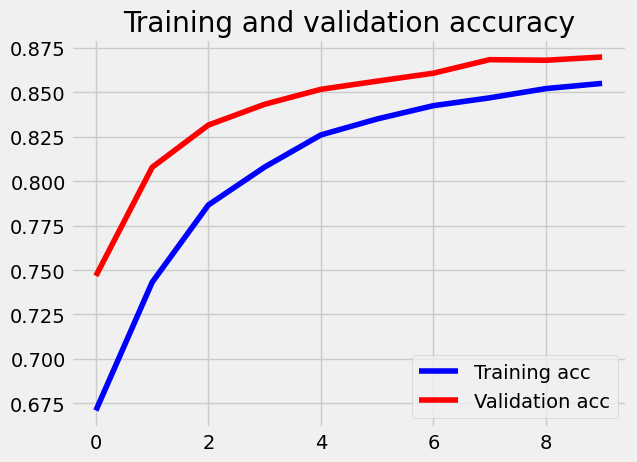

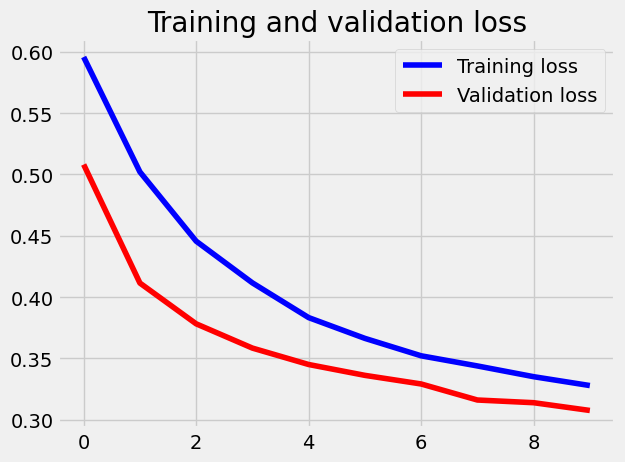

In [87]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### **Step - 5.9 :** Prediction using Model 

In [88]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL ### Whatever not coming in negative and positive sentiments has been considered as neutral
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [91]:
# def predict(clean_text, include_neutral=True):
#     start_at = time.time()
#     # Tokenize clean_text
#     x_test = pad_sequences(tokenizer.texts_to_sequences([clean_text]), maxlen=SEQUENCE_LENGTH)
#     # Predict
#     score = model.predict([x_test])[0]
#     # Decode sentiment
#     label = decode_sentiment(score, include_neutral=include_neutral)

#     return {"label": label, "score": float(score),
#        "elapsed_time": time.time()-start_at}  

def predict(clean_text, include_neutral=True):
    import time
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    start_at = time.time()
    
    # Tokenize clean_text
    x_test = pad_sequences(tokenizer.texts_to_sequences([clean_text]), maxlen=SEQUENCE_LENGTH)
    
    # Convert to tensor and move to device
    x_tensor = torch.tensor(x_test, dtype=torch.long).to(device)
    
    # Predict
    model.eval()
    with torch.no_grad():
        score = model(x_tensor)[0].item()  # Get scalar value
    
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
            "elapsed_time": time.time()-start_at}

In [92]:
predict("I love the music")

{'label': 'POSITIVE',
 'score': 0.9973099231719971,
 'elapsed_time': 0.0010466575622558594}

In [93]:
predict("I have nothing to lose")

{'label': 'NEUTRAL',
 'score': 0.5602043867111206,
 'elapsed_time': 0.003972291946411133}

In [94]:
predict("Experience has been bad")

{'label': 'NEGATIVE',
 'score': 0.03540436923503876,
 'elapsed_time': 0.015280961990356445}

### **Step - 5.10 :** Creating Confusion Matrix 

In [96]:
# Batch prediction on test set
def predict_batch(model, x_test, batch_size=8000, verbose=1):
    from torch.utils.data import TensorDataset, DataLoader
    
    # Convert to tensor
    x_tensor = torch.tensor(x_test, dtype=torch.long)
    
    # Create dataset and loader
    test_dataset = TensorDataset(x_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Predict
    model.eval()
    all_scores = []
    
    with torch.no_grad():
        for i, (batch_x,) in enumerate(test_loader):
            batch_x = batch_x.to(device)
            outputs = model(batch_x)
            all_scores.extend(outputs.cpu().numpy())
            
            if verbose == 1:
                print(f"Batch {i+1}/{len(test_loader)}")
    
    return all_scores

In [114]:
torch.cuda.empty_cache()
import gc
gc.collect()

6473

In [107]:
#%%time
y_pred_1d = []
y_test_1d = list(df_test.category)
scores = predict_batch(model, x_test, verbose=1, batch_size=4000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

Batch 1/6
Batch 2/6
Batch 3/6
Batch 4/6
Batch 5/6
Batch 6/6


In [57]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

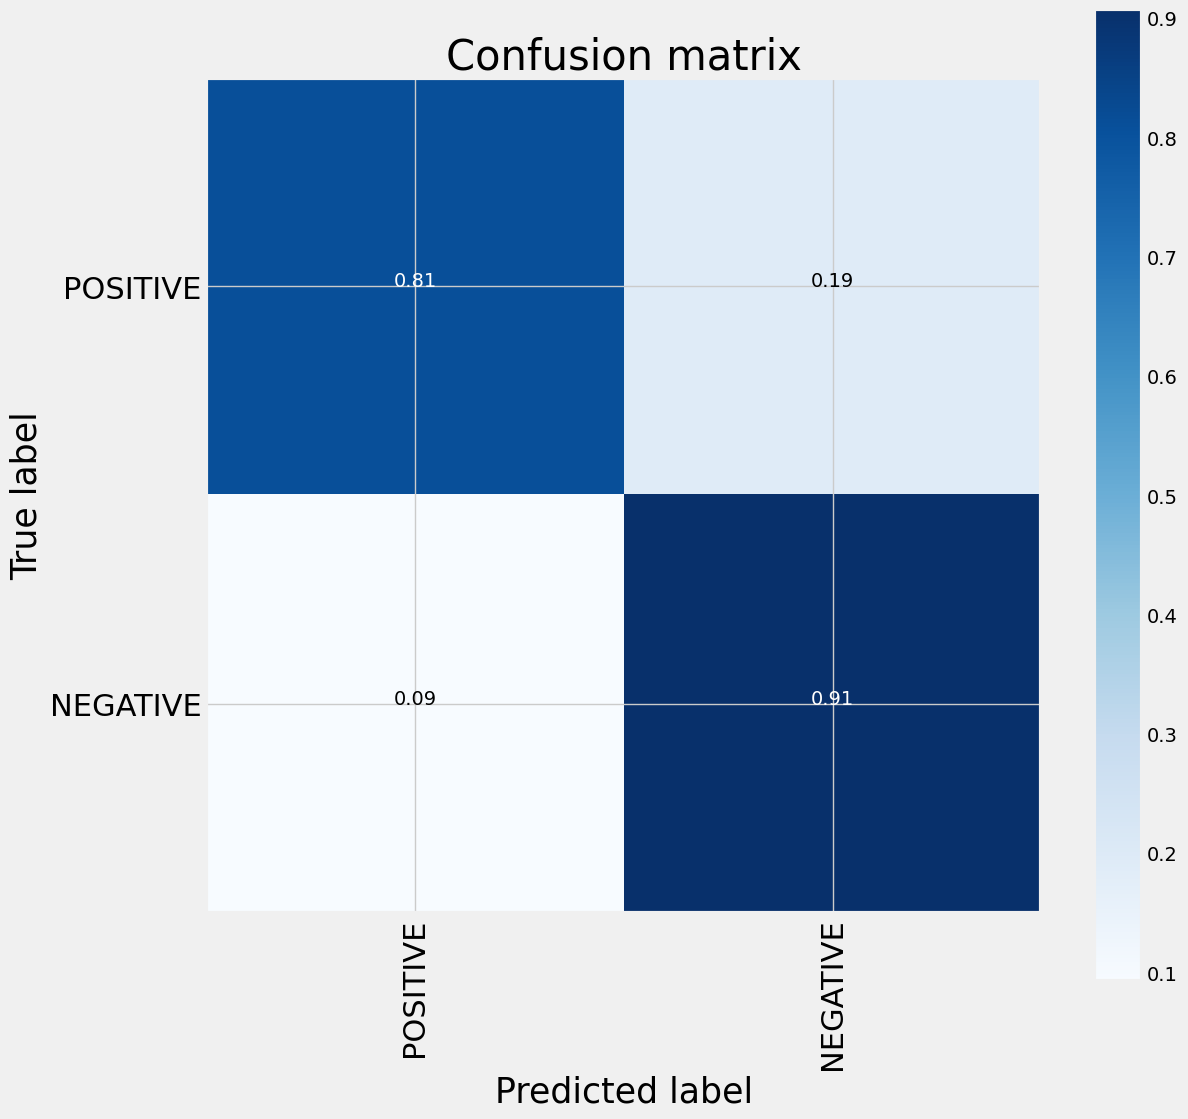

In [109]:
#%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.category.unique(), title="Confusion matrix")
plt.show()

### **Step - 5.11 :** Classification Report 

In [110]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.81      0.81      0.81      7026
    POSITIVE       0.91      0.91      0.91     14526

    accuracy                           0.88     21552
   macro avg       0.86      0.86      0.86     21552
weighted avg       0.88      0.88      0.88     21552



### **Step - 5.12 :** Accuracy Score 

In [111]:
accuracy_score(y_test_1d, y_pred_1d)

0.8754175946547884

### **Step - 5.13 :** Saving Model for future use 

In [113]:
# model.save("new_model/" + KERAS_MODEL)
# w2v_model.save("new_model/" + WORD2VEC_MODEL)
# pickle.dump(tokenizer, open("new_model/" + TOKENIZER_MODEL, "wb"), protocol=0)
# pickle.dump(encoder, open("new_model/" + ENCODER_MODEL, "wb"), protocol=0)

import pickle

# Create directory if it doesn't exist
os.makedirs("new_model", exist_ok=True)

# Save PyTorch model
torch.save(model.state_dict(), "new_model/" + KERAS_MODEL.replace('.h5', '.pth'))
# Or save entire model (includes architecture)
# torch.save(model, "new_model/" + KERAS_MODEL.replace('.h5', '_full.pth'))

# Save Word2Vec model (same as Keras version)
w2v_model.save("new_model/" + WORD2VEC_MODEL)

# Save tokenizer (same as Keras version)
pickle.dump(tokenizer, open("new_model/" + TOKENIZER_MODEL, "wb"), protocol=0)

# Save encoder (same as Keras version)
pickle.dump(encoder, open("new_model/" + ENCODER_MODEL, "wb"), protocol=0)

print("Models saved successfully!")

2025-10-02 17:12:31,775 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'new_model/model.w2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-10-02T17:12:31.775125', 'gensim': '4.3.3', 'python': '3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26220-SP0', 'event': 'saving'}
2025-10-02 17:12:31,776 : INFO : not storing attribute cum_table
2025-10-02 17:12:31,794 : INFO : saved new_model/model.w2v


Models saved successfully!


## **References:**

* **LSTM Overview** : [**Link**](https://www.analyticsvidhya.com/blog/2022/03/an-overview-on-long-short-term-memory-lstm/)
* **Code Optimisation Techniques** : [**Link**](https://www.geeksforgeeks.org/optimization-tips-python-code/)

# Upgrade using Transformer

In [46]:
# Ensure train_df and test_df exist
try:
    df_train.shape, df_test.shape
except NameError as e:
    raise NameError('train_df and test_df must exist in the notebook before running this cell.') from e

# Map string labels to integers
label_map = {'positive': 0, 'negative': 1, 'neutral': 2}
inv_label_map = {v:k for k,v in label_map.items()}

def map_labels(df, col='label'):
    df = df.copy()
    if df[col].dtype == object:
        # Normalize strings to lowercase and strip
        df[col] = df[col].str.lower().str.strip()
    df[col] = df[col].map(label_map)
    if df[col].isnull().any():
        raise ValueError('Some labels could not be mapped to integers. Check label values.')
    return df

train_df_mapped = map_labels(df_train, col='category')
test_df_mapped = map_labels(df_test, col='category')

print('Train shape:', train_df_mapped.shape)
print('Test shape :', test_df_mapped.shape)
print('Label distribution (train):\\n', train_df_mapped['category'].value_counts())
print('Label distribution (test):\\n', test_df_mapped['category'].value_counts())

Train shape: (86206, 2)
Test shape : (21552, 2)
Label distribution (train):\n category
0    57723
1    28483
Name: count, dtype: int64
Label distribution (test):\n category
0    14526
1     7026
Name: count, dtype: int64


In [47]:
# Convert pandas DataFrame to HuggingFace Dataset
hf_train = Dataset.from_pandas(train_df_mapped.reset_index(drop=True))
hf_test  = Dataset.from_pandas(test_df_mapped.reset_index(drop=True))

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

# Tokenization function
def tokenize_fn(batch):
    return tokenizer(batch['lemma_str'], padding='max_length', truncation=True, max_length=128)

hf_train = hf_train.map(tokenize_fn, batched=True, batch_size=256)
hf_test  = hf_test.map(tokenize_fn, batched=True, batch_size=256)

# Rename label column to 'labels' for Trainer
hf_train = hf_train.rename_column('category', 'labels')
hf_test  = hf_test.rename_column('category', 'labels')

# Set format for PyTorch
hf_train.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
hf_test.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

print(hf_train)
print(hf_test)

Map: 100%|██████████| 21552/21552 [00:01<00:00, 21452.13 examples/s]

Dataset({
    features: ['lemma_str', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 86206
})
Dataset({
    features: ['lemma_str', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 21552
})


In [48]:
# Load DistilBERT for sequence classification
num_labels = len(label_map)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
model.config.id2label = {0: 'positive', 1: 'negative', 2: 'neutral'}
model.config.label2id = {'positive': 0, 'negative': 1, 'neutral': 2}

# Quick device allocation info
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
print('Model loaded to', device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded to cuda


In [49]:
# Compute metrics for Trainer
import evaluate
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1_weighted': f1}

In [134]:
import transformers
import accelerate
import importlib

importlib.reload(transformers)
importlib.reload(accelerate)

<module 'accelerate' from 'c:\\Users\\Hieu\\OneDrive\\MSE - FPT\\Fall 2025\\NLP501\\Exercises\\LSTM\\.venv\\Lib\\site-packages\\accelerate\\__init__.py'>

In [50]:
# Training arguments
training_args = TrainingArguments(
    output_dir='./results-distilbert',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    greater_is_better=True,
    logging_dir='./logs/logs-distilbert',
    logging_strategy='epoch',
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_train,
    eval_dataset=hf_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [51]:
# Start training (will use GPU if available)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted
1,0.286200,0.212874,0.916852,0.917113
2,0.193900,0.211885,0.923163,0.922939
3,0.151400,0.255458,0.925251,0.925533
4,0.118700,0.284145,0.925947,0.926051


TrainOutput(global_step=21552, training_loss=0.18754305198799706, metrics={'train_runtime': 2572.3707, 'train_samples_per_second': 134.049, 'train_steps_per_second': 8.378, 'total_flos': 1.1419688218834944e+16, 'train_loss': 0.18754305198799706, 'epoch': 4.0})

In [53]:
# Evaluate best model
metrics = trainer.evaluate()
print('Evaluation metrics:\\n', metrics)

# Optionally: detailed confusion matrix and per-class metrics
from sklearn.metrics import classification_report, confusion_matrix
preds_output = trainer.predict(hf_test)
preds = np.argmax(preds_output.predictions, axis=-1)
labels = preds_output.label_ids

Evaluation metrics:\n {'eval_loss': 0.28414517641067505, 'eval_accuracy': 0.9259465478841871, 'eval_f1_weighted': 0.926051263208884, 'eval_runtime': 41.1952, 'eval_samples_per_second': 523.168, 'eval_steps_per_second': 16.361, 'epoch': 4.0}


\nClassification report:
              precision    recall  f1-score   support

    positive       0.95      0.94      0.94     14526
    negative       0.88      0.89      0.89      7026

    accuracy                           0.93     21552
   macro avg       0.91      0.92      0.92     21552
weighted avg       0.93      0.93      0.93     21552



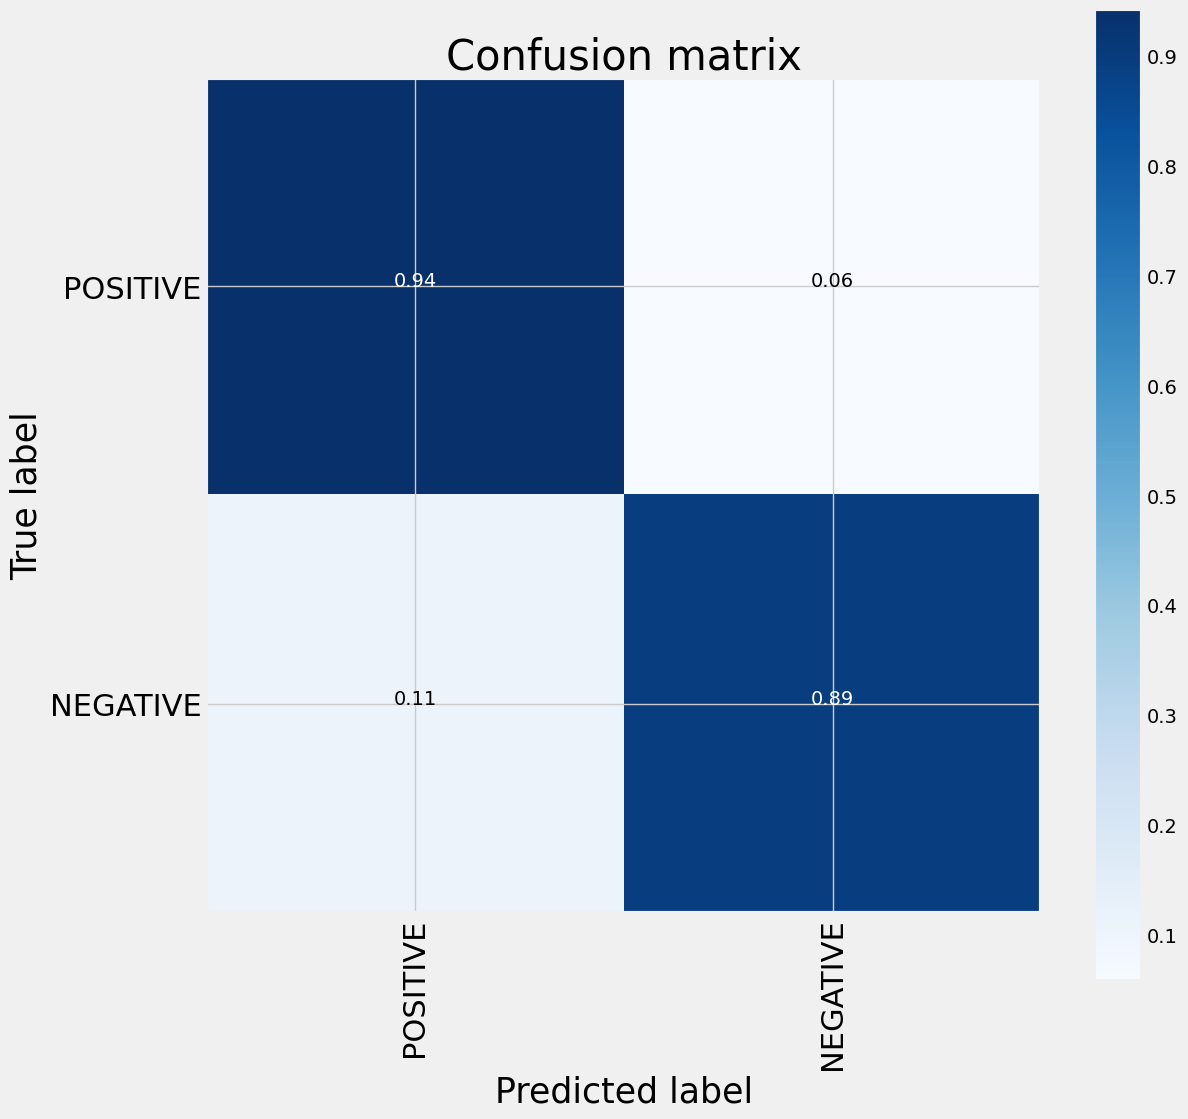

In [58]:
print('\\nClassification report:')
print(classification_report(labels, preds, target_names=['positive','negative']))

cnf_matrix = confusion_matrix(labels, preds)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.category.unique(), title="Confusion matrix")
plt.show()

In [62]:
from scipy.special import softmax

id2label = {0: "positive", 1: "negative", 2: "neutral"}

def predict_texts(texts, top_k=3):
    model.eval()
    enc = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    ).to(model.device)

    with torch.no_grad():
        outputs = model(**enc)
        logits = outputs.logits.cpu().numpy()

    probs = softmax(logits, axis=-1)
    results = []
    for text, prob_vec in zip(texts, probs):
        # sort probs descending
        top_indices = np.argsort(prob_vec)[::-1][:top_k]
        top_labels = [(id2label[i], float(prob_vec[i])) for i in top_indices]
        results.append({
            "text": text,
            "top_predictions": top_labels
        })
    return results

# 🔸 Test thử vài câu
demo_texts = [
    "I love the new update! it's awesome ❤️",
    "This is the worst service ever. totally disappointed.",
    "Meh, the product is okay I guess."
]

print("🔍 Demo predictions with scores:")
for res in predict_texts(demo_texts, top_k=3):
    print(f"\nText: {res['text']}")
    for label, score in res['top_predictions']:
        print(f"  - {label:<8}: {score:.4f}")

🔍 Demo predictions with scores:

Text: I love the new update! it's awesome ❤️
  - positive: 0.9999
  - negative: 0.0001
  - neutral : 0.0000

Text: This is the worst service ever. totally disappointed.
  - negative: 0.9980
  - positive: 0.0020
  - neutral : 0.0000

Text: Meh, the product is okay I guess.
  - positive: 0.9999
  - negative: 0.0001
  - neutral : 0.0000


In [63]:
print(predict_texts(["I like dog"]))

[{'text': 'I like dog', 'top_predictions': [('positive', 0.997042715549469), ('negative', 0.002957305172458291), ('neutral', 4.9578844141251466e-08)]}]


In [61]:
if not os.path.exists("best_model"):
    os.makedirs("best_model")

save_path = "./best_model/distilbert-sentiment-model"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"✅ Model & tokenizer saved to: {save_path}")

✅ Model & tokenizer saved to: ./best_model/distilbert-sentiment-model
